<a href="https://colab.research.google.com/github/SarahSouzaPontes/Classificacao_binaria_banco/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importando bibliotecas

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


SITUAÇÃO PROBLEMA:
Clientes estão fechando conta no banco,
precisando usar os dados para saber a insatisfação.

In [9]:
df = pd.read_csv("/content/sample_data/dataset.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
#rownumber é como um id
df = df.drop('RowNumber', axis = 1)
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
#cpf como chave (index)
df = df.set_index('CustomerId')

In [12]:
df


,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [13]:
df.loc[15634602]
#retorna linha do cliente

Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 15634602, dtype: object

In [14]:
df.iloc[2]
#retorna a posição
#python inicia a 0

Surname                 Onio
CreditScore              502
Geography             France
Gender                Female
Age                       42
Tenure                     8
Balance             159660.8
NumOfProducts              3
HasCrCard                  1
IsActiveMember             0
EstimatedSalary    113931.57
Exited                     1
Name: 15619304, dtype: object

In [15]:
#colunas em strings
#Transformar texto em número
#Transformar em Dummy
df_d= pd.get_dummies(df)

In [16]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,
15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [17]:
df_d.iloc[0:20]


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,...,0,0,0,0,0,1,0,0,1,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,...,0,0,0,0,0,1,0,0,1,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0
15574012,645,44,8,113755.78,2,1,0,149756.71,1,0,...,0,0,0,0,0,0,0,1,0,1
15592531,822,50,7,0.00,2,1,1,10062.80,0,0,...,0,0,0,0,0,1,0,0,0,1
15656148,376,29,4,115046.74,4,1,0,119346.88,1,0,...,0,0,0,0,0,0,1,0,1,0
15792365,501,44,4,142051.07,2,0,1,74940.50,0,0,...,0,0,0,0,0,1,0,0,0,1


In [18]:
#ultimas 20 colunas
df_d.iloc[0:20]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Surname_Abazu,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,...,0,0,0,0,0,1,0,0,1,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,...,0,0,0,0,0,1,0,0,1,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0
15574012,645,44,8,113755.78,2,1,0,149756.71,1,0,...,0,0,0,0,0,0,0,1,0,1
15592531,822,50,7,0.00,2,1,1,10062.80,0,0,...,0,0,0,0,0,1,0,0,0,1
15656148,376,29,4,115046.74,4,1,0,119346.88,1,0,...,0,0,0,0,0,0,1,0,1,0
15792365,501,44,4,142051.07,2,0,1,74940.50,0,0,...,0,0,0,0,0,1,0,0,0,1


In [33]:
X= df_d.drop('Exited', axis = 1)
#resposta
y = df_d.Exited

In [34]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Surname_Abazu,Surname_Abbie,...,Surname_Zubarev,Surname_Zubareva,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CustomerId,,,,,,,,,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,0,0,...,0,0,0,0,0,1,0,0,1,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,...,0,0,0,0,0,0,0,1,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,0,0,...,0,0,0,0,0,1,0,0,1,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,0,...,0,0,0,0,0,1,0,0,1,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,0,0,...,0,0,0,0,0,1,0,0,0,1
15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,...,0,0,0,0,0,1,0,0,0,1
15584532,709,36,7,0.00,1,0,1,42085.58,0,0,...,0,0,0,0,0,1,0,0,1,0


In [35]:
y

CustomerId
15634602    1
15647311    0
15619304    1
15701354    0
15737888    0
           ..
15606229    0
15569892    0
15584532    1
15682355    1
15628319    0
Name: Exited, Length: 10000, dtype: int64

VAR preditiva e VAR resposta => prever

In [36]:
#proporção de classes
#fecharam e não fecharam conta
y.mean()

0.2037

In [37]:
y.value_counts()/y.shape[0]
#mesma conta da linha acima
#proporcoes de classe
#não se trata de evento raro

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [38]:
#dividir em conj de treino e test
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts =  train_test_split(X,y, test_size = 0.30, random_state = 61658) #randomizar igual para reproduzir mesmo resultado, mas não é obrigatório
#RETORNA 4 VAR a função

TREINAR MODLELO

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# objeto radom e colocar na var para aprender
rf = RandomForestClassifier(n_estimators = 500, max_depth = 10, random_state= 61658, n_jobs = -1)

In [44]:
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=61658)

In [45]:
rf.predict_proba(X_ts)
#model treinado
#scrore propensao
#matriz de duas colunas
#1 col propensao do cliente n deixar o banco ou seja var resp ser 0
#segunda coluna propensao da var resp ser 1
#nao é probabilidade apesar de somar 1

array([[0.77830931, 0.22169069],
       [0.78143357, 0.21856643],
       [0.7644429 , 0.2355571 ],
       ...,
       [0.75750048, 0.24249952],
       [0.83725705, 0.16274295],
       [0.8296555 , 0.1703445 ]])

In [47]:
pd.DataFrame(rf.predict_proba(X_ts), columns = ['Propensão 0 ', 'Propensão']) 

,Propensão 0,Propensão
0,0.778309,0.221691
1,0.781434,0.218566
2,0.764443,0.235557
3,0.829437,0.170563
4,0.823122,0.176878
...,...,...
2995,0.811811,0.188189
2996,0.784953,0.215047
2997,0.757500,0.242500
2998,0.837257,0.162743


In [48]:
pred = rf.predict_proba(X_ts)[:,1]

In [49]:
pred

array([0.22169069, 0.21856643, 0.2355571 , ..., 0.24249952, 0.16274295,
       0.1703445 ])

MÉTRICAS

In [51]:
#AUC
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
from sklearn.metrics import roc_auc_score
roc_auc_score(y_ts, pred)
#metrica de meio até 1
#bom modelo

0.8110854166666667

Histograma para entender o coorrido

(array([ 668., 1001.,  644.,  360.,  148.,   78.,   59.,   22.,   10.,
          10.]),
 array([0.1458298 , 0.17239006, 0.19895032, 0.22551058, 0.25207085,
        0.27863111, 0.30519137, 0.33175163, 0.35831189, 0.38487215,
        0.41143242]),
 <BarContainer object of 10 artists>)

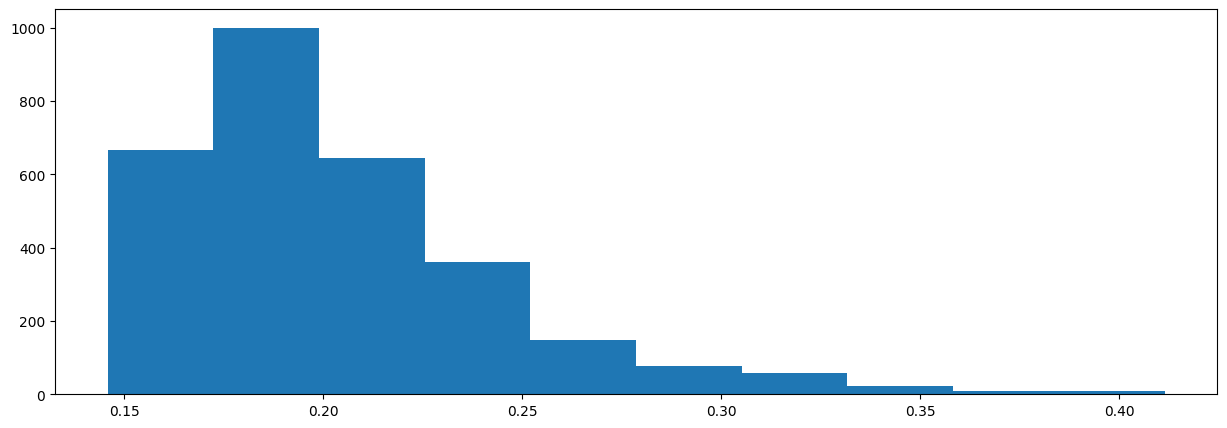

In [52]:
plt.figure(figsize=(15,5))
plt.hist(pred)
#10 bins
#mais pessoas com score alto que baixo
#dados desbalanceados


(array([13.,  8., 16., 36., 31., 37., 30., 50., 38., 28., 61., 28., 36.,
        23., 28., 17.,  8., 28., 22., 12., 11.,  4.,  9.,  7.,  1.,  5.,
         3.,  2.,  5.,  3.]),
 array([0.15091574, 0.15959963, 0.16828352, 0.17696741, 0.1856513 ,
        0.19433519, 0.20301908, 0.21170297, 0.22038686, 0.22907075,
        0.23775464, 0.24643852, 0.25512241, 0.2638063 , 0.27249019,
        0.28117408, 0.28985797, 0.29854186, 0.30722575, 0.31590964,
        0.32459353, 0.33327741, 0.3419613 , 0.35064519, 0.35932908,
        0.36801297, 0.37669686, 0.38538075, 0.39406464, 0.40274853,
        0.41143242]),
 <BarContainer object of 30 artists>)

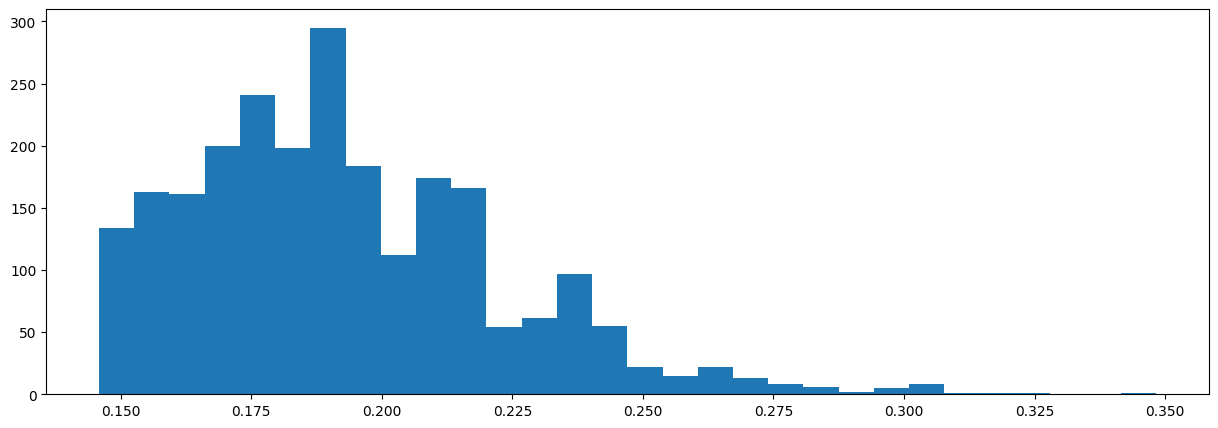

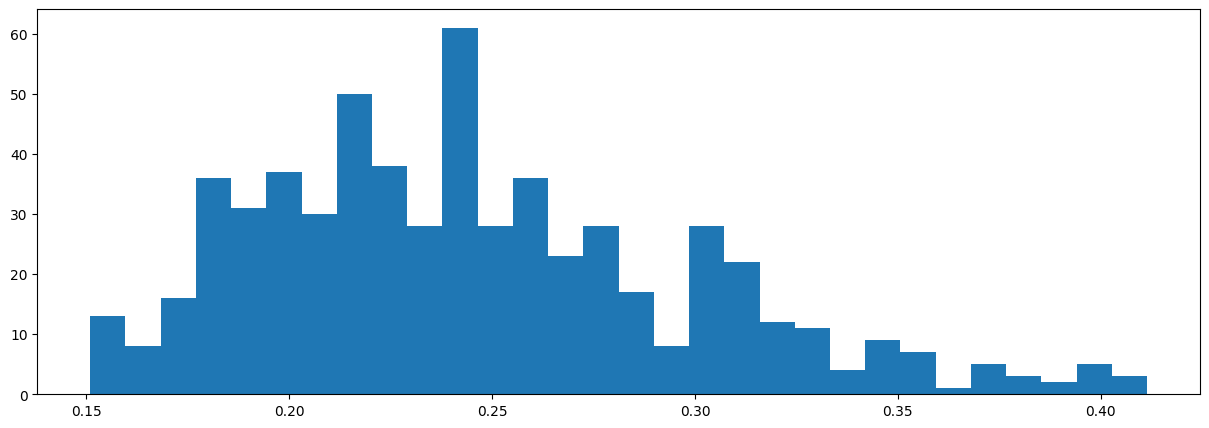

In [53]:
#score de quem ficou no banco
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins = 30)
#10 bins
#mais pessoas com score alto que baixo
#dados desbalanceados
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==1], bins = 30)
#nao estao na mesma escala, sendo que o segundo é de quem não deixa o banco e o primeiro quem deixa o banco

COMPARAR HISTOGRAMAS (CLASSIFICAÇÃO E MULTICLASSES);
COLOCAR TODOS NA MESMA ESCALA

In [54]:
np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

explicitando onde deseja cada bins

(array([0.        , 0.        , 0.        , 0.        , 1.25666667,
        6.09      , 8.12      , 5.89666667, 4.30166667, 1.74      ,
        1.015     , 0.58      , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
        0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
        0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
        0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
        0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
        0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
 <BarContainer object of 29 artists>)

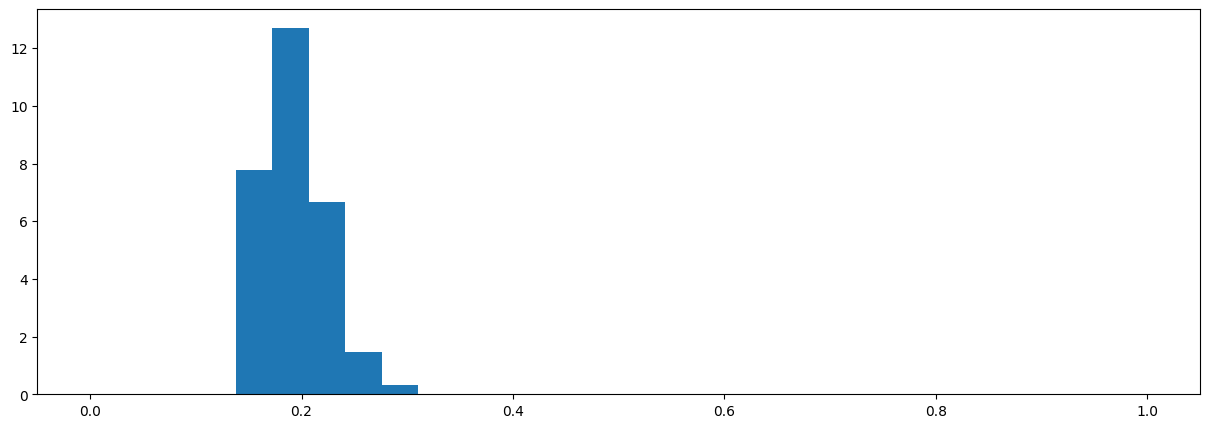

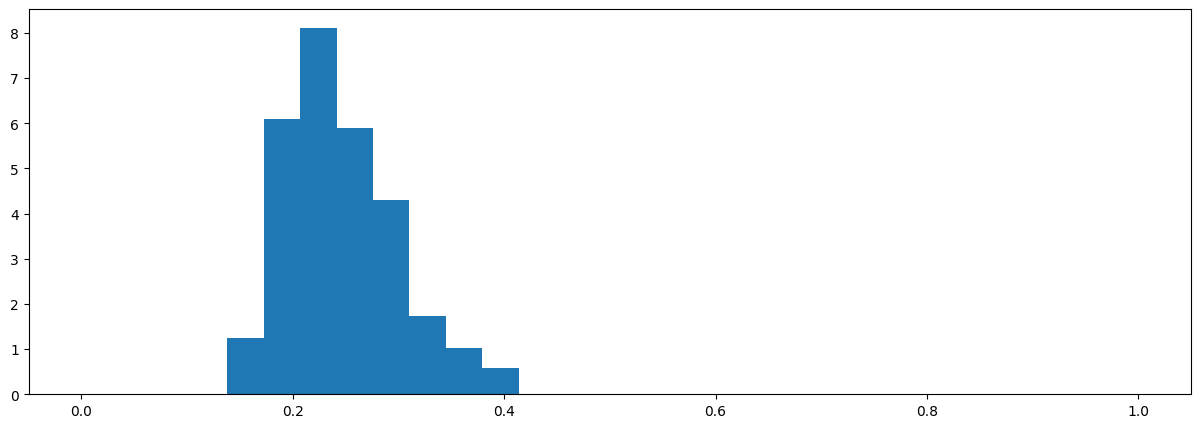

In [55]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins = np.linspace(0,1,30), density = True)
#####
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==1], bins = np.linspace(0,1,30), density = True) 

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.30666667, 3.92      , 6.45166667,
        7.75833333, 8.49333333, 6.125     , 4.81833333, 2.53166667,
        3.675     , 1.55166667, 0.89833333, 0.735     , 0.49      ,
        0.245     , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
        0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
        0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
        0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
        0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.

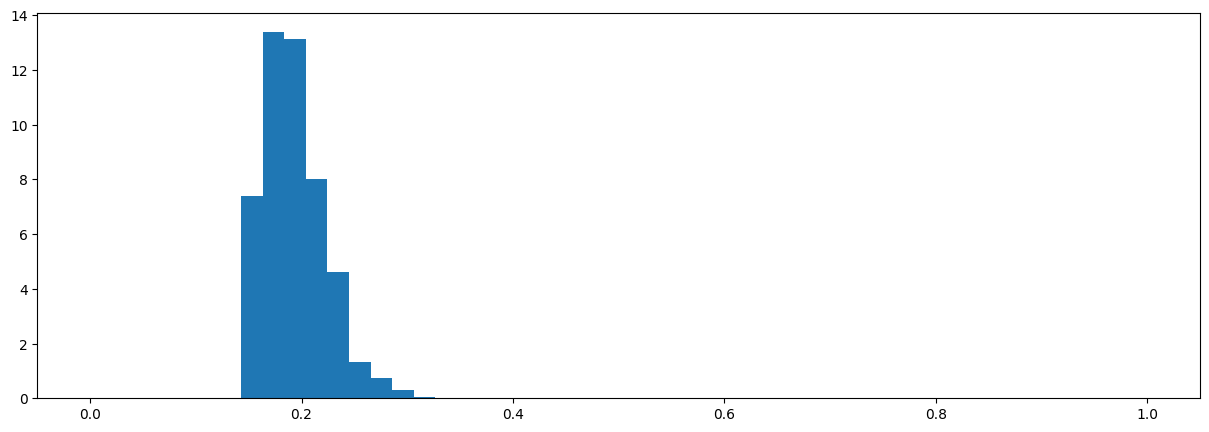

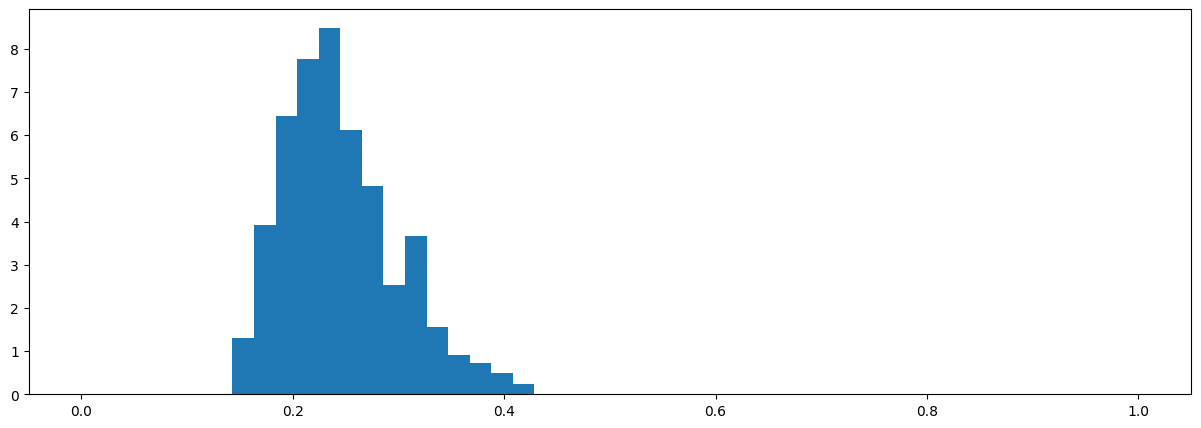

In [56]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins = np.linspace(0,1,50), density = True)
#####
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==1], bins = np.linspace(0,1,50), density = True) 

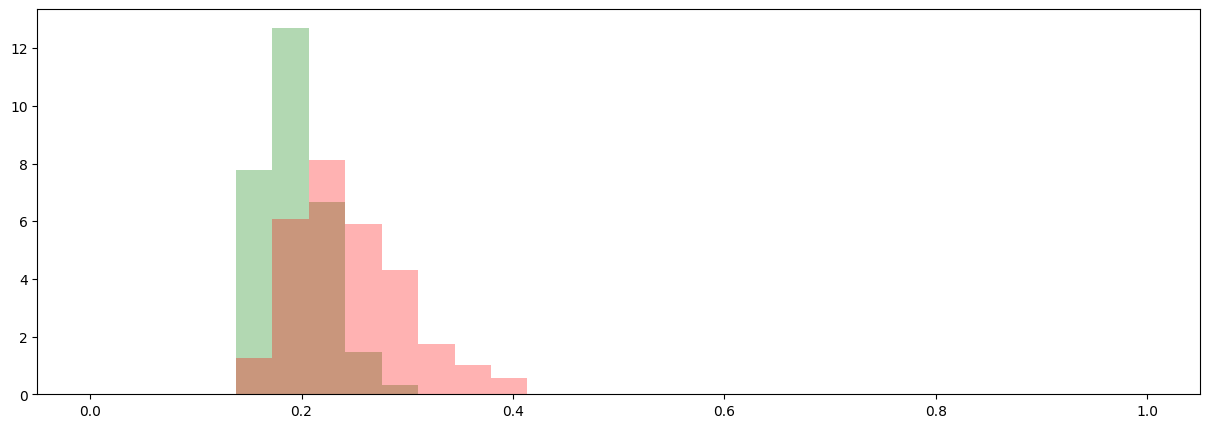

In [59]:
#comprara hist colocar no mesmo graf
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins = np.linspace(0,1,30), density = True, color= 'g', alpha = .3)#sobreposicao de graf
plt.hist(pred[y_ts==1], bins = np.linspace(0,1,30), density = True, color = 'r', alpha = .3); #sobreposicao de graf

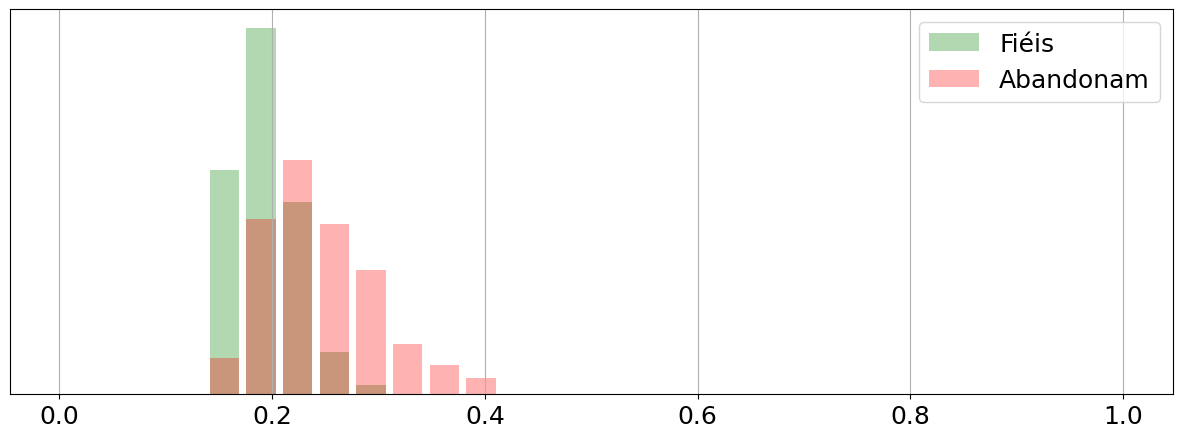

In [91]:
#delineando Histograma 
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins = np.linspace(0,1,30), density = True, color= 'g', alpha = .3, rwidth = 0.8, label= "Fiéis")#sobreposicao de graf
plt.hist(pred[y_ts==1], bins = np.linspace(0,1,30), density = True, color = 'r', alpha = .3, rwidth = 0.8, label= "Abandonam"); #sobreposicao de graf

plt.xticks(fontsize= 18);
plt.yticks([])
plt.legend(fontsize = 18)
plt.grid()